## Single Packet Tracking ##

In this notebook, a single real packet will be tracked as it passes through the ejecta. For this we have to make changes in the existing configuration file. Finally we will be plotting its trajectory, by graphing `mu` vs `r`.

`TARDIS` has the functionality to track the properties of the Real Packets that are generated when running the Simulation. The rpacket_tracker can track all the interactions a packet undergoes & thus keeps a track of the various properties, a packet may have. Currently, the rpacket_tracker tracks the properties of all the rpackets in the `Last Iteration` of the Simulation.

In [1]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data
from tardis.io.config_reader import Configuration

/home/jayant/anaconda3/envs/tardis/lib/python3.7/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)


Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

#### Downloading the atomic data ####

In [ ]:
# The data are automatically downloaded
download_atom_data('kurucz_cd23_chianti_H_He')

#### Downloading the example file ####

In [3]:
!curl -O https://raw.githubusercontent.com/tardis-sn/tardis/master/docs/tardis_example.yml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   980  100   980    0     0    668      0  0:00:01  0:00:01 --:--:--   668


In [2]:
# Reading the Configuration stored in `tardis_example.yml` into config

config = Configuration.from_yaml("tardis_example.yml")

#### Setting the model configuration ####

Here we have to make some changes to config file to enable tracking of a single packet.

The changes are:

1. Setting `r_packet_tracking` to True to turn on the tracking of real packets.
2. Setting `no of packets` to 1, since we are tracking only one packet.
3. Setting `last no of packets` to 1. This won't make any difference for single iteration, since that will be the last iteration and the first.
4. Setting `iterations` to 1, as one iteration is enough to track a single packet.
5. Setting `no of virtual packets` to 0.

In [3]:
# Setting `r_packet_tracking` to True to turn on the Tracking 

config["montecarlo"]["tracking"]["track_rpacket"] = True

In [137]:
# Setting `no_of_packets` and `iterations` to 1

config["montecarlo"]["no_of_packets"]=1
config["montecarlo"]["last_no_of_packets"]=1
config["montecarlo"]["iterations"]=1

# Setting number of virtual packets to 0

config["montecarlo"]["no_of_virtual_packets"]=0

In [138]:
# Checking the montecarlo config for the changes made

config["montecarlo"]

{'seed': 23111963,
 'no_of_packets': 1,
 'iterations': 1,
 'nthreads': 1,
 'last_no_of_packets': 1,
 'no_of_virtual_packets': 0,
 'convergence_strategy': {'type': 'damped',
  'damping_constant': 1.0,
  'threshold': 0.05,
  'fraction': 0.8,
  'hold_iterations': 3,
  't_inner': {'damping_constant': 0.5, 'threshold': 0.05},
  'stop_if_converged': False,
  'lock_t_inner_cycles': 1,
  't_inner_update_exponent': -0.5,
  't_rad': {'damping_constant': 1.0, 'threshold': 0.05},
  'w': {'damping_constant': 1.0, 'threshold': 0.05}},
 'virtual_spectrum_spawn_range': {'start': <Quantity 1. Angstrom>,
  'end': <Quantity inf Angstrom>},
 'enable_reflective_inner_boundary': False,
 'inner_boundary_albedo': 0.0,
 'enable_full_relativity': False,
 'tracking': {'track_rpacket': True, 'initial_array_length': 10},
 'debug_packets': False,
 'logger_buffer': 1,
 'single_packet_seed': -1}

#### Running the simulation (with custom configuration) ####

In [139]:
sim = run_tardis(config)

[tardis.plasma.standard_plasmas][INFO   ]  
	
	Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:92)
[tardis.io.atom_data.base][INFO   ]  
	Reading Atom Data with: UUID = 6f7b09e887a311e7a06b246e96350010 MD5  = 864f1753714343c41f99cb065710cace  (base.py:204)
[tardis.io.atom_data.base][INFO   ]  
	Non provided Atomic Data: synpp_refs, photoionization_data, yg_data, two_photon_data (base.py:209)
[py.warnings         ][WARNING]  
	/home/jayant/anaconda3/envs/tardis/lib/python3.7/site-packages/tardis-22.3.3.0.dev380+gf541e73b.d20220310-py3.7.egg/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning: invalid value encountered in true_divide
  (g_lower * n_upper) / (g_upper * n_lower)
 (warnings.py:110)
[tardis.simulation.base][INFO   ]  
	
	Starting iteration 1 of 1 (base.py:378)
[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.051e+43 erg / s
	Luminosity absorbed  = 0.000e+00 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:54

#### RPacket Class Structure ####

Basic structure for the RPacketCollection Class

The properties that are tracked are as follows :

1. `index` - Index of the Packet
2. `seed` - Seed of the Packet
3. `status` - Current Status for the Packet Interaction
4. `r` - Radius of the Current Shell
5. `nu` - Packet’s Frequency
6. `mu` - Propagation Direction of the Packet (cosine of the angle the packet’s path makes with the radial direction)
7. `energy` - Energy of the Packet
8. `shell_id` - Current Shell Id where the Packet is present`

In [129]:
sim.runner.rpacket_tracker[0].r

array([1.23552000e+15, 1.28606400e+15, 1.33660800e+15, 1.34160296e+15,
       1.38715200e+15, 1.43769600e+15, 1.48824000e+15, 1.53878400e+15,
       1.58932800e+15, 1.63987200e+15, 1.69041600e+15, 1.74096000e+15,
       1.77601211e+15, 1.79150400e+15, 1.84204800e+15, 1.89259200e+15,
       1.94313600e+15, 1.99368000e+15, 2.04422400e+15, 2.09476800e+15,
       2.14531200e+15, 2.19585600e+15, 2.24640000e+15])

In [130]:
sim.runner.rpacket_tracker[0].shell_id

array([ 0,  1,  2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 19])

#### Plotting the trajectory of Packet ####

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'mu (Propagation Direction of the Packet)')

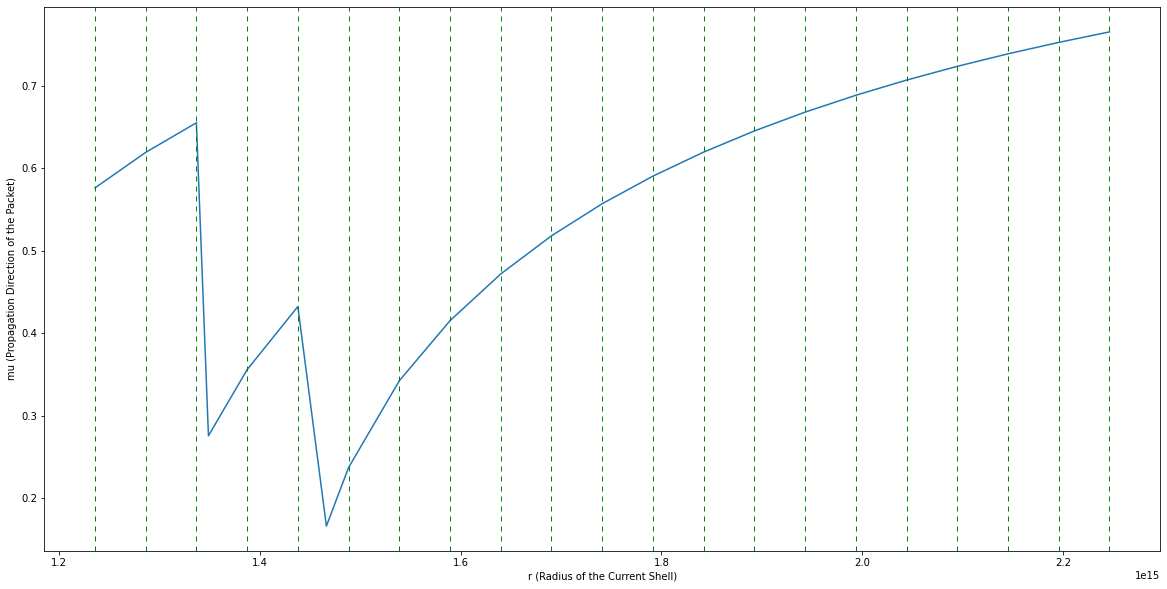

In [140]:
# Plotting the trajectory of real packet i.e. plotting the graph of mu vs r 

%pylab inline
figure(figsize=(20,10))
plot(sim.runner.rpacket_tracker[0].r,sim.runner.rpacket_tracker[0].mu)

# Adding vertical lines for showing shell boundaries
for r in sim.model.radius:
    axvline(x=r.value,color='g',lw=1,ls='--',dashes=(5,5))
    
xlabel('r (Radius of the Current Shell)')
ylabel('mu (Propagation Direction of the Packet)')